# Word Cloud

## nltk 설치 및 Download
- conda install nltk
- nltk.Download()

In [1]:
import nltk

In [3]:
# All Packages>punkt, stopwords download
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

## wordcloud 설치
- conda install -c conda-forge wordcloud

In [4]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image       # 이미지 출력을 위한것

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Alice in Wonderland

In [11]:
with open('Data/Alice.txt','r') as f:       # 데이터를 r로해서 읽기
    text = f.read()
stopwords = set(STOPWORDS)
len(stopwords)

192

In [12]:
# stopwords에 'said'추가
stopwords.add('said')

In [13]:
wc = WordCloud(background_color='white',
               max_words=2000,
stopwords=stopwords)
wc = wc.generate(text)

In [17]:
# 순서가 거꾸로 되어있어 바르게 정렬하기, sorting
keys = list(wc.words_.keys())
values = list(wc.words_.values())
for i in range(10):
    print(f'{keys[i]}:{values[i]}')     # 어떤단어가 많이 나왔는지 알수있음 / 10개뽑기기

Alice:1.0
little:0.29508196721311475
one:0.27595628415300544
know:0.2459016393442623
went:0.226775956284153
thing:0.2185792349726776
time:0.2103825136612022
Queen:0.20765027322404372
see:0.1830601092896175
King:0.17486338797814208


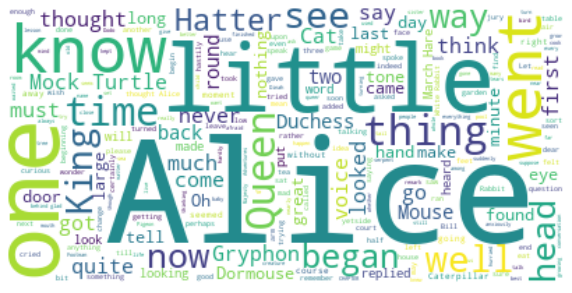

In [18]:
plt.figure(figsize=(10,6))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()

- 그림 위에 표시하기

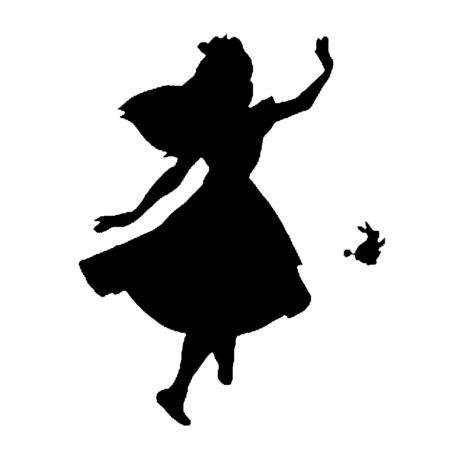

In [19]:
mask = np.array(Image.open('Data/Alice_mask.png'))
plt.figure(figsize=(8,8))
plt.imshow(mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

In [20]:
wc = WordCloud(background_color='white',
               max_words=2000,
               mask = mask,             
               stopwords=stopwords)
wc = wc.generate(text)

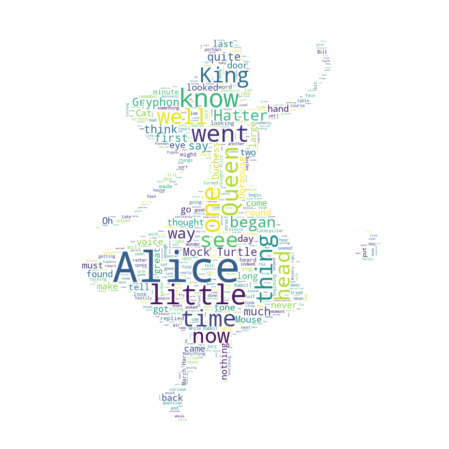

In [21]:
plt.figure(figsize=(8,8))
plt.imshow(wc, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

### Star Wars - A New Hope

In [22]:
with open('Data/A_new_hope.txt','r') as f:
    text = f.read()
text = text.replace('HAN','Han')
text = text.replace("LUKE'S",'Luke')
mask = np.array(Image.open('Data/Stormtrooper_mask.png'))

In [23]:
stopwords = set(STOPWORDS)
stopwords.add('int')
stopwords.add('ext')

In [24]:
wc = WordCloud(max_words=1000,
               mask = mask,             
               stopwords=stopwords,
               margin=10,
               random_state=1).generate(text)
default_colors = wc.to_array()

In [25]:
import random
def grey_color(word, font_size, position,
               orientation, random_state=None,
               **kwargs):
  # return 'hsl(0, 0%%, %d%%)' % random.randint(60,100)
  # hue, saturation, lightness
   return f'hsl(0, 0%, {random.randint(60,100)}%)'

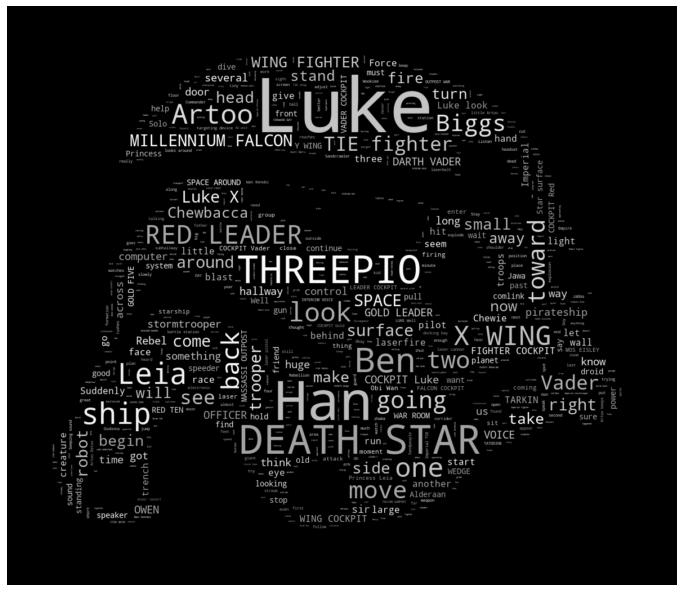

In [26]:
plt.figure(figsize=(12,12))
plt.imshow(wc.recolor(color_func=grey_color, random_state=3), interpolation='bilinear')
plt.axis('off')
plt.show()